# Homework
Follow the example from the previous notebook [Linear Regression using SGD](./01_linear_regression_sgd.ipynb) and build a loop that properly finds the centers of these 4 clusters using k-means.

(400, 2) (400,) (4, 2)


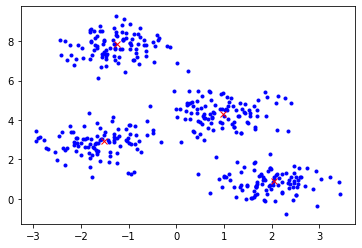

In [1]:
# Simulate dataset

import time
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
from sklearn.datasets import make_blobs

npoints = 400
N = 4
x, cluster_labels, cluster_centers = make_blobs(n_samples=npoints, centers=N,
                                                cluster_std=0.60, random_state=0,
                                                return_centers=True)
print(x.shape,cluster_labels.shape,cluster_centers.shape)
plt.plot(x[:, 0], x[:, 1], 'b.')
plt.plot(cluster_centers[:,0],cluster_centers[:,1], 'rx')

In [2]:
# Create centroid
def initialize_centroids(x, N):
    x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
    centroids = x[x_indices]
    return centroids

def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])

In [3]:
# distance is sqrt( (x - x')**2 + (y - y')**2 )
def assign_labels(x,c):
    # centroids are shape [N,2]
    # x are shape [npoints,2]
    # add middle index to centroids to properly broadcast in math operations
    c = c[:,np.newaxis,:] # [N,1,2]

    # calculate (x - x')**2 and (y - y')**2
    # x is shape [npoints,2], c is [N,1,2] results in an array of shape: [N,npoints,2]
    dist2 = (x - c)**2

    # calculate (x - x')**2 + (y - y')**2
    dist2 = dist2.sum(axis=2) # [N,npoints]

    # out of the N distances, return the index (0-(N-1)) of the one that is the minimum.
    label = np.argmin(dist2,axis=0) # [npoints]

    return label

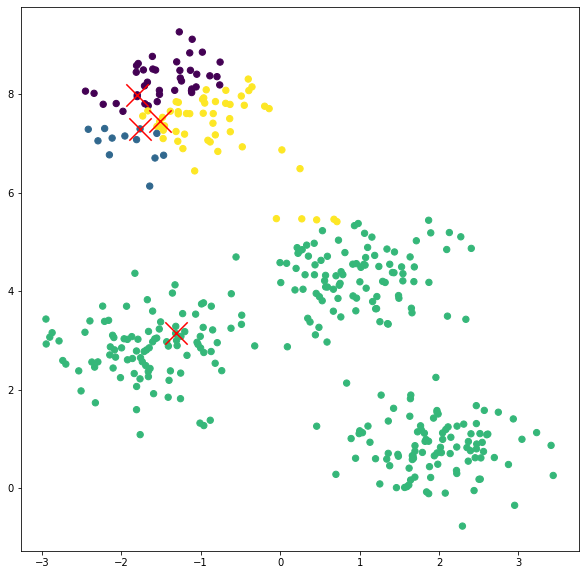

In [4]:
c = initialize_centroids(x, N)
l = assign_labels(x, c)
plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:, 1], c=l, s=40, cmap='viridis')
plt.scatter(c[:,0], c[:,1], marker="x", color='r', s=500)

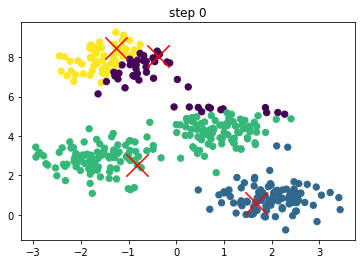

In [5]:
n_iter = 1
max_iter = 100
delta = 0.001

last_centroids = initialize_centroids(x,N)
last_labels = assign_labels(x,last_centroids)
plt.scatter(x[:,0], x[:,1], c=last_labels, s=40, cmap='viridis')
plt.scatter(last_centroids[:,0], last_centroids[:,1], marker="x", color='r', s=500)
plt.title('step %d' % 0)
plt.show()
time.sleep(1)
ipydis.clear_output(wait=True)

accuracy:  0.7425


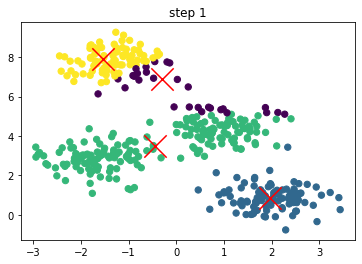

accuracy:  0.8075


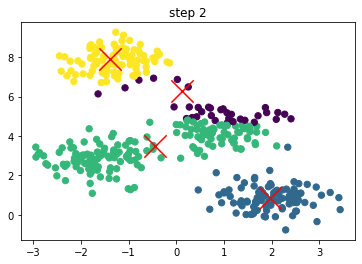

accuracy:  0.95


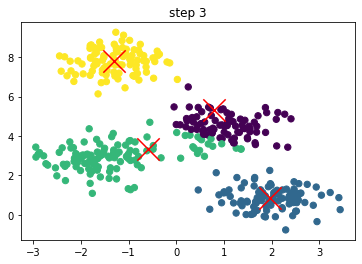

accuracy:  1.0


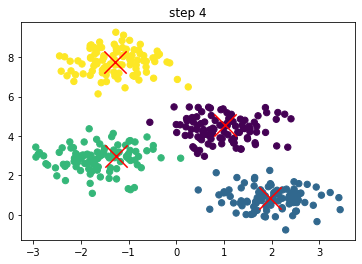

accuracy:  1.0


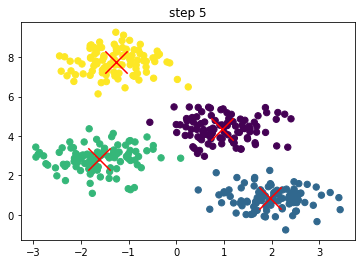

centroids unchanged as of step 6


In [6]:
while True:
    centroids = get_new_centroids(x,last_labels,N)
    labels = assign_labels(x,centroids)

    # test if centroids have stopped moving
    if np.all((last_centroids - centroids) < delta):
        last_labels = labels
        last_centroids = centroids
        print('centroids unchanged as of step %d' % n_iter)
        break
    #elif np.all(labels == last_labels):
    #    print('point labels unchanged as of step %d' % n_iter)
    #    break
    elif n_iter == max_iter:
        last_labels = labels
        last_centroids = centroids
        print('max iteration is achieved!')
        break
    else:
        last_labels = labels
        last_centroids = centroids

    # we can use the "truth" labels, cluster_labels to see how well we are doing
    # accuracy: # of points correctly labeled / total number of points
    accuracy = np.sum((cluster_labels == labels).astype(int)) / cluster_labels.shape[0]
    print('accuracy: ',accuracy)
    plt.scatter(x[:,0], x[:,1], c=last_labels, s=40, cmap='viridis')
    plt.scatter(last_centroids[:,0], last_centroids[:,1], marker="x", color='r', s=500)
    plt.title('step %d' % n_iter)
    plt.show()
    #time.sleep(2.0)
    #ipydis.clear_output(wait=True)
    
    n_iter += 1

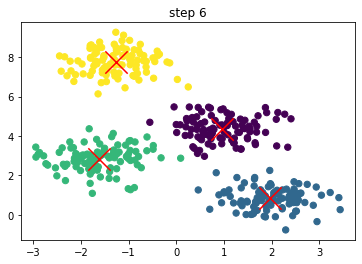

In [7]:
plt.scatter(x[:,0], x[:,1], c=last_labels, s=40, cmap='viridis')
plt.scatter(last_centroids[:,0], last_centroids[:,1], marker="x", color='r', s=500)
plt.title('step %d' % n_iter)
plt.show()